# Load Data

In [13]:
import tensorflow
from tensorflow import keras

# Paths to dataset folders
train_dir = "ASL_Alphabet_Dataset/asl_alphabet_train"
test_dir = "ASL_Alphabet_Dataset/asl_alphabet_test"

# Image size and batch size
img_size = (32, 32)
batch_size = 32

# Training and validation data generators
datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 178472 images belonging to 29 classes.
Found 44602 images belonging to 29 classes.


# Load Test

In [46]:
import os
import numpy as np

# Manually load test images
test_images = []
test_image_names = []

for img_name in os.listdir(test_dir):
    img_path = os.path.join(test_dir, img_name)
    img = keras.preprocessing.image.load_img(img_path, target_size=img_size)  # Load and resize image
    img_array = keras.preprocessing.image.img_to_array(img) / 255.0  # Normalize
    test_images.append(img_array)
    test_image_names.append(img_name.split('_')[0])

# Convert to NumPy array
test_images = np.array(test_images)

# Model Activation

In [15]:

model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(29, activation='softmax')  # 29 classes (A-Z)
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting Model

In [17]:
epochs = 10
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

Epoch 1/10
5578/5578 ━━━━━━━━━━━━━━━━━━━━ 467s 84ms/step - accuracy: 0.4915 - loss: 1.6655 - val_accuracy: 0.7345 - val_loss: 1.3613
Epoch 2/10
5578/5578 ━━━━━━━━━━━━━━━━━━━━ 474s 85ms/step - accuracy: 0.8639 - loss: 0.4077 - val_accuracy: 0.7678 - val_loss: 1.4885
Epoch 3/10
5578/5578 ━━━━━━━━━━━━━━━━━━━━ 483s 87ms/step - accuracy: 0.9188 - loss: 0.2489 - val_accuracy: 0.7836 - val_loss: 1.3544
Epoch 4/10
5578/5578 ━━━━━━━━━━━━━━━━━━━━ 482s 86ms/step - accuracy: 0.9370 - loss: 0.1906 - val_accuracy: 0.7855 - val_loss: 1.6743
Epoch 5/10
5578/5578 ━━━━━━━━━━━━━━━━━━━━ 475s 85ms/step - accuracy: 0.9470 - loss: 0.1638 - val_accuracy: 0.7868 - val_loss: 1.7029
Epoch 6/10
5578/5578 ━━━━━━━━━━━━━━━━━━━━ 478s 86ms/step - accuracy: 0.9547 - loss: 0.1379 - val_accuracy: 0.7966 - val_loss: 1.8518
Epoch 7/10
5578/5578 ━━━━━━━━━━━━━━━━━━━━ 479s 86ms/step - accuracy: 0.9588 - loss: 0.1281 - val_accuracy: 0.7959 - val_loss: 1.6987
Epoch 8/10
5578/5578 ━━━━━━━━━━━━━━━━━━━━ 481s 86ms/step - accuracy: 

# Loss/Accuracy over epochs (validation)

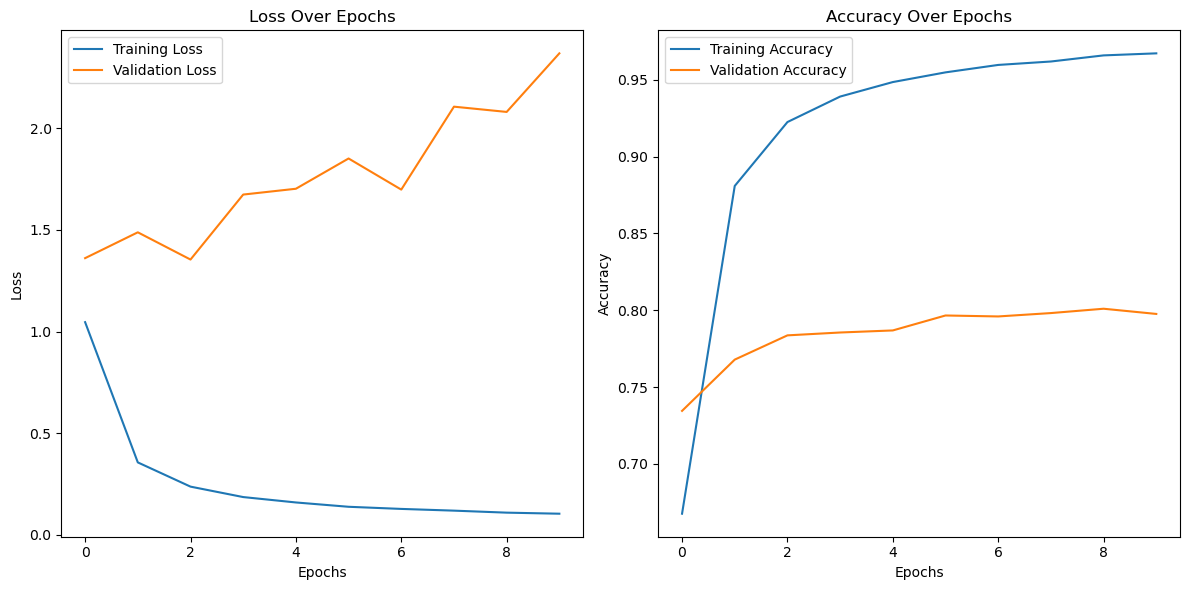

In [40]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Loss And Accuracy

In [43]:
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Ensure order of images matches predictions
)

# Actual labels
true_classes = test_generator.classes  # This gives the integer indices of the true labels
class_indices = test_generator.class_indices  # This is a mapping of class names to indices
labels = list(class_indices.keys())  # Class names



Found 0 images belonging to 0 classes.


In [41]:
model.save("asl_cnn_model.h5")
model.save('asl_cnn.keras')

# Predictions

In [47]:
# Predict on test images
predictions = model.predict(test_images)

# Get predicted class indices
predicted_classes = np.argmax(predictions, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


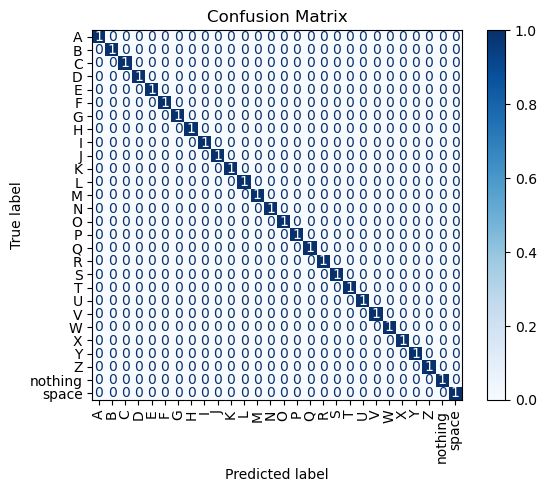

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict the test set
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)  # Predicted class indices

# Map test_image_names (labels) to class indices
class_indices = train_generator.class_indices  # Get the mapping of class names to indices
true_classes = np.array([class_indices[label] for label in test_image_names])  # Convert true labels to indices

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Dynamically match class labels to the confusion matrix
unique_classes = sorted(set(true_classes) | set(predicted_classes))  # Ensure all unique classes are included
labels = [list(class_indices.keys())[list(class_indices.values()).index(cls)] for cls in unique_classes]

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()

In [37]:
# Get class indices mapping from the training generator
class_indices = train_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}  # Reverse mapping

# Map predicted classes to labels
predicted_labels = [class_labels[pred] for pred in predicted_classes]


In [39]:
for i in range(len(test_images)):
    print(f"Image: {test_image_names[i]}, Predicted Label: {predicted_labels[i]}")


Image: F, Predicted Label: F
Image: G, Predicted Label: G
Image: L, Predicted Label: L
Image: M, Predicted Label: M
Image: R, Predicted Label: R
Image: S, Predicted Label: S
Image: X, Predicted Label: X
Image: Y, Predicted Label: Y
Image: U, Predicted Label: U
Image: T, Predicted Label: T
Image: A, Predicted Label: A
Image: K, Predicted Label: K
Image: J, Predicted Label: J
Image: Z, Predicted Label: Z
Image: nothing, Predicted Label: nothing
Image: Q, Predicted Label: Q
Image: P, Predicted Label: P
Image: space, Predicted Label: space
Image: O, Predicted Label: O
Image: N, Predicted Label: N
Image: E, Predicted Label: E
Image: D, Predicted Label: D
Image: H, Predicted Label: H
Image: I, Predicted Label: I
Image: B, Predicted Label: B
Image: C, Predicted Label: C
Image: V, Predicted Label: V
Image: W, Predicted Label: W
